In [104]:
import pandas as pd
import numpy as np
import random

In [105]:
try:
    df = pd.read_csv('styles.csv', on_bad_lines='skip') # put everything in the same __path__ 
except:
    df = pd.read_csv('styles.csv', on_bad_lines='skip') # and enter relative paths of file you want to open

In [106]:
rows_to_remove = [6044, 7939, 9926, 10264, 10427, 10906, 11373, 11945, 14112, 14532, 15076, 33020, 35962, 37770, 38404]


In [108]:
df = df.drop(rows_to_remove, axis=0, errors='ignore')

In [109]:
df.reset_index(drop=True, inplace=True)

In [110]:
diverse_cities = [
    'Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad',
    'Jaipur', 'Lucknow', 'Ahmedabad', 'Srinagar', 'Goa', 'Kochi',
    'Guwahati', 'Bhopal', 'Shimla'
]
df['location'] = np.random.choice(diverse_cities, size=len(df))
df.to_csv('your_dataset_with_location.csv', index=False)

In [111]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,location
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,Ahmedabad
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,Srinagar
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,Chennai
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,Guwahati
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,Srinagar


In [112]:
cloth_df = df[df['masterCategory'] == 'Apparel']
cloth_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,location
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,Ahmedabad
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,Srinagar
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,Guwahati
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,Srinagar
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,Shimla


In [114]:
def extract_company_name(product_name):
    if isinstance(product_name, str):
        return product_name.split()[0]
    else:
        return None

# Make sure cloth_df is a copy of the original DataFrame to avoid SettingWithCopyWarning
cloth_df = cloth_df.copy()

# Apply the function to extract company names
cloth_df.loc[:, 'company'] = cloth_df['productDisplayName'].apply(extract_company_name)


In [115]:
cloth_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,location,company
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,Ahmedabad,Turtle
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,Srinagar,Peter
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,Guwahati,Manchester
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,Srinagar,Puma
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,Shimla,Inkfruit
...,...,...,...,...,...,...,...,...,...,...,...,...
44399,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Striped Black Jersey,Kochi,Nike
44400,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Chimp Men Teja Main Hoon Blue Tshirts,Mumbai,Chimp
44402,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Tantra Women Printed Peach T-shirt,Delhi,Tantra
44403,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,Bhopal,Sepia


In [116]:
def remove_company_name(product_name):
    words = product_name.split()
    cleaned_name = ' '.join(words[1:])
    return cleaned_name
cloth_df['cleaned_productDisplayName'] = cloth_df['productDisplayName'].apply(remove_company_name)

In [117]:
cloth_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,location,company,cleaned_productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,Ahmedabad,Turtle,Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,Srinagar,Peter,England Men Party Blue Jeans
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,Guwahati,Manchester,United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,Srinagar,Puma,Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,Shimla,Inkfruit,Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44399,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Nike Men Striped Black Jersey,Kochi,Nike,Men Striped Black Jersey
44400,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Chimp Men Teja Main Hoon Blue Tshirts,Mumbai,Chimp,Men Teja Main Hoon Blue Tshirts
44402,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Tantra Women Printed Peach T-shirt,Delhi,Tantra,Women Printed Peach T-shirt
44403,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Sepia Women Blue Printed Top,Bhopal,Sepia,Women Blue Printed Top


In [118]:
cloth_df.drop('productDisplayName', axis=1, inplace=True)

In [80]:
cloth_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,location,company,cleaned_productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Srinagar,Turtle,Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Jaipur,Peter,England Men Party Blue Jeans
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Delhi,Manchester,United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Goa,Puma,Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Srinagar,Inkfruit,Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...,...,...
44399,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Sports,Bhopal,Nike,Men Striped Black Jersey
44400,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Srinagar,Chimp,Men Teja Main Hoon Blue Tshirts
44402,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,2011.0,Casual,Bhopal,Tantra,Women Printed Peach T-shirt
44403,42234,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Mumbai,Sepia,Women Blue Printed Top


In [119]:
cloth_df.drop('year',axis=1,inplace=True)
cloth_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,location,company,cleaned_productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Ahmedabad,Turtle,Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Srinagar,Peter,England Men Party Blue Jeans
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Guwahati,Manchester,United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Srinagar,Puma,Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Shimla,Inkfruit,Mens Chain Reaction T-shirt
...,...,...,...,...,...,...,...,...,...,...,...
44399,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,Sports,Kochi,Nike,Men Striped Black Jersey
44400,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual,Mumbai,Chimp,Men Teja Main Hoon Blue Tshirts
44402,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Casual,Delhi,Tantra,Women Printed Peach T-shirt
44403,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Casual,Bhopal,Sepia,Women Blue Printed Top


In [122]:
fabric_options = {
    'Jeans': ['denim', 'cotton', 'polyester', 'blend', 'corduroy', 'canvas'],
    'Kurtas': ['cotton', 'silk', 'linen', 'khadi', 'rayon', 'wool'],
    'Tshirts': ['cotton', 'polyester', 'nylon', 'spandex', 'viscose', 'modal'],
    'Shirts': ['cotton', 'polyester', 'nylon', 'spandex', 'viscose', 'modal'],
    'Sweatshirts': ['fleece', 'cotton', 'polyester', 'wool', 'blend', 'cashmere'],
    'Shorts': ['nylon', 'cotton', 'polyester', 'spandex', 'linen', 'silk'],
    'Track Pants': ['cotton', 'polyester', 'nylon', 'blend', 'fleece', 'spandex'],
    'Kurtis': ['cotton', 'silk', 'chiffon', 'georgette', 'linen', 'rayon'],
    'Kurta Sets': ['cotton', 'silk', 'velvet', 'chanderi', 'banarasi', 'organza'],
    'Tops': ['cotton', 'polyester', 'silk', 'lace', 'chiffon', 'viscose'],
    'Waistcoat': ['silk', 'cotton', 'polyester', 'wool', 'blend', 'linen'],
    'Sarees': ['silk', 'cotton', 'chiffon', 'georgette', 'linen', 'banarasi'],
    'Night suits': ['cotton', 'satin', 'flannel', 'velvet', 'fleece', 'silk'],
    'Shrug': ['cotton', 'polyester', 'silk', 'lace', 'chiffon', 'viscose'],
    'Trousers': ['cotton', 'polyester', 'wool', 'blend', 'linen', 'corduroy'],
    'Capris': ['cotton', 'polyester', 'nylon', 'spandex', 'linen', 'silk'],
    'Jackets': ['leather', 'nylon', 'polyester', 'wool', 'blend', 'down'],
    'Lounge Pants': ['cotton', 'fleece', 'polyester', 'silk', 'velvet', 'satin'],
    'Tunics': ['cotton', 'silk', 'chiffon', 'georgette', 'linen', 'rayon'],
    'Skirts': ['cotton', 'silk', 'polyester', 'wool', 'denim', 'velvet'],
    'Tracksuits': ['polyester', 'nylon', 'cotton', 'spandex', 'fleece', 'mesh'],
    'Swimwear': ['nylon', 'polyester', 'spandex', 'lycra', 'mesh', 'neoprene'],
    'Jumpsuit': ['cotton', 'polyester', 'silk', 'denim', 'linen', 'spandex'],
    'Dupatta': ['silk', 'cotton', 'chiffon', 'georgette', 'banarasi', 'velvet'],
    'Sweaters': ['wool', 'cashmere', 'blend', 'cotton', 'polyester', 'acrylic'],
    'unknown': ['cotton','nylon','polyester']
}

def random_fabric_assignment(article_type):
    if article_type in fabric_options:
        return random.choice(fabric_options[article_type])
    else:
        return 'fabric_unknown'
cloth_df['fabric'] = cloth_df['articleType'].apply(random_fabric_assignment)





In [123]:
cloth_df.drop('cleaned_productDisplayName',axis=1,inplace=True)

In [124]:
cloth_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,location,company,fabric
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual,Ahmedabad,Turtle,polyester
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Srinagar,Peter,blend
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Guwahati,Manchester,fleece
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Srinagar,Puma,nylon
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual,Shimla,Inkfruit,cotton
...,...,...,...,...,...,...,...,...,...,...,...
44399,30614,Men,Apparel,Topwear,Tshirts,Black,Summer,Sports,Kochi,Nike,nylon
44400,13496,Men,Apparel,Topwear,Tshirts,Blue,Fall,Casual,Mumbai,Chimp,nylon
44402,12544,Women,Apparel,Topwear,Tshirts,Peach,Fall,Casual,Delhi,Tantra,cotton
44403,42234,Women,Apparel,Topwear,Tops,Blue,Summer,Casual,Bhopal,Sepia,cotton


In [125]:
fit_options = {
    'Jeans': ['flared', 'baggy', 'loose', 'skinny', 'straight', 'bootcut'],
    'Kurtas': ['loose', 'fitted', 'anarkali', 'straight', 'asymmetric', 'layered'],
    'Tshirts': ['regular', 'slim', 'athletic', 'oversized', 'fitted', 'boxy'],
    'Shirt': ['regular fit', 'slim fit', 'tailored fit', 'classic fit', 'relaxed fit', 'muscle fit'],
    'Sweatshirts': ['relaxed', 'fitted', 'oversized', 'cropped', 'boxy', 'athletic'],
    'Shorts': ['athletic', 'casual', 'tailored', 'cargo', 'running', 'bermuda'],
    'Track Pants': ['comfortable', 'fitted', 'relaxed', 'slim', 'athletic', 'jogger'],
    'Kurtis': ['loose', 'fitted', 'anarkali', 'straight', 'asymmetric', 'layered'],
    'Kurta Sets': ['ethnic', 'traditional', 'modern', 'contemporary', 'fusion', 'festive'],
    'Tops': ['regular', 'crop', 'off-shoulder', 'peplum', 'halterneck', 'wrap'],
    'Waistcoat': ['formal', 'casual', 'ethnic', 'tailored', 'traditional', 'stylish'],
    'Sarees': ['traditional', 'designer', 'bridal', 'contemporary', 'printed', 'embroidered'],
    'Night suits': ['comfortable', 'fitted', 'oversized', 'classic', 'cozy', 'stylish'],
    'Shrug': ['casual', 'formal', 'boho', 'cropped', 'layered', 'chic'],
    'Trousers': ['formal', 'casual', 'tailored', 'slim', 'wide-leg', 'cropped'],
    'Capris': ['athletic', 'casual', 'tailored', 'cropped', 'cargo', 'bermuda'],
    'Jackets': ['fitted', 'bomber', 'oversized', 'tailored', 'biker', 'puffer'],
    'Lounge Pants': ['comfortable', 'fitted', 'relaxed', 'cozy', 'stylish', 'athleisure'],
    'Tunics': ['regular', 'asymmetric', 'layered', 'longline', 'boho', 'peplum'],
    'Skirts': ['feminine', 'flared', 'pleated', 'pencil', 'maxi', 'mini'],
    'Tracksuits': ['athletic', 'casual', 'sporty', 'cozy', 'jogger', 'stylish'],
    'Swimwear': ['athletic', 'fitted', 'beach', 'sporty', 'high-waisted', 'bikini'],
    'Jumpsuit': ['stylish', 'fitted', 'wide-leg', 'casual', 'tailored', 'flared'],
    'Dupatta': ['traditional', 'embroidered', 'printed', 'designer', 'festive', 'stylish'],
    'Sweaters': ['warm', 'cozy', 'fitted', 'oversized', 'turtleneck', 'cardigan'],
    'Unknown Product Type': ['regular'],
}
def random_fit_assignment(article_type):
    if article_type in fit_options:
        return random.choice(fit_options[article_type])
    else:
        return 'regular'
cloth_df['fit_type'] = cloth_df['articleType'].apply(random_fit_assignment)


In [126]:
cloth_df.drop('masterCategory',axis=1,inplace=True)

In [127]:
cloth_df

,id,gender,subCategory,articleType,baseColour,season,usage,location,company,fabric,fit_type
0,15970,Men,Topwear,Shirts,Navy Blue,Fall,Casual,Ahmedabad,Turtle,polyester,regular
1,39386,Men,Bottomwear,Jeans,Blue,Summer,Casual,Srinagar,Peter,blend,loose
3,21379,Men,Bottomwear,Track Pants,Black,Fall,Casual,Guwahati,Manchester,fleece,jogger
4,53759,Men,Topwear,Tshirts,Grey,Summer,Casual,Srinagar,Puma,nylon,slim
5,1855,Men,Topwear,Tshirts,Grey,Summer,Casual,Shimla,Inkfruit,cotton,oversized
...,...,...,...,...,...,...,...,...,...,...,...
44399,30614,Men,Topwear,Tshirts,Black,Summer,Sports,Kochi,Nike,nylon,boxy
44400,13496,Men,Topwear,Tshirts,Blue,Fall,Casual,Mumbai,Chimp,nylon,athletic
44402,12544,Women,Topwear,Tshirts,Peach,Fall,Casual,Delhi,Tantra,cotton,slim
44403,42234,Women,Topwear,Tops,Blue,Summer,Casual,Bhopal,Sepia,cotton,peplum


In [128]:
cloth_df.columns

Index(['id', 'gender', 'subCategory', 'articleType', 'baseColour', 'season',
       'usage', 'location', 'company', 'fabric', 'fit_type'],
      dtype='object')

In [129]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors


In [90]:
# categorical_features = ['gender', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'location', 'company', 'fabric', 'fit_type']
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Transform the data
# X = cloth_df.drop(columns=['id'])
# X_transformed = preprocessor.fit_transform(X)

# # Fit the NearestNeighbors model
# knn = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_transformed)

In [91]:
# def get_recommendations(location, n_recommendations=5):
#     # Find the index of the location in the original dataframe
#     loc_index = cloth_df[cloth_df['location'] == location].index[0]

#     # Transform the input data to the encoded format
#     X_input = preprocessor.transform(X.iloc[[loc_index]])

#     # Find the nearest neighbors
#     distances, indices = knn.kneighbors(X_input, n_neighbors=n_recommendations)

#     # Get the recommended products
#     recommendations = cloth_df.iloc[indices[0]].drop(index=loc_index)

#     return recommendations

# # Example: Get recommendations for 'New York'
# recommendations = get_recommendations('Delhi', n_recommendations=5)
# print(recommendations)

In [130]:
df_with_location = cloth_df.copy()

In [131]:
categorical_features = ['gender', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'company', 'fabric', 'fit_type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Prepare the data
X = df_with_location[categorical_features]
y = df_with_location['location']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

Accuracy: 0.0715
Precision: 0.0716
Recall: 0.0717
F1 Score: 0.0714


id              0
gender          0
subCategory     0
articleType     0
baseColour      6
season          1
usage          24
location        0
company         0
fabric          0
fit_type        0
dtype: int64


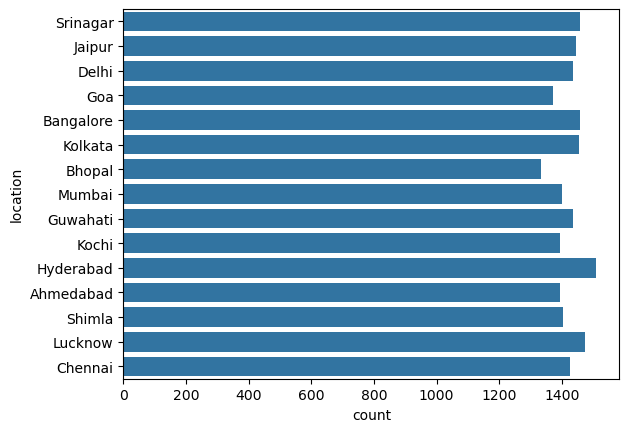

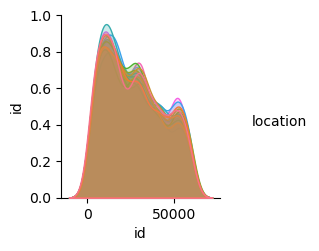

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Assuming df_with_location is already defined as above

# Check for missing values
print(df_with_location.isnull().sum())

# Explore the distribution of locations
sns.countplot(y=df_with_location['location'])
plt.show()

# Explore the relationship between features and location
sns.pairplot(df_with_location, hue='location')
plt.show()

In [95]:
print(df_with_location.isnull().sum())

id              0
gender          0
subCategory     0
articleType     0
baseColour      6
season          1
usage          24
location        0
company         0
fabric          0
fit_type        0
dtype: int64


In [96]:
df_cleaned = df_with_location.dropna()

In [97]:
print(df_cleaned.isnull().sum())

id             0
gender         0
subCategory    0
articleType    0
baseColour     0
season         0
usage          0
location       0
company        0
fabric         0
fit_type       0
dtype: int64


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [99]:
label_encoders = {}
categorical_columns = ['company', 'articleType', 'baseColour', 'season', 'usage', 'location', 'fabric', 'fit_type','gender','subCategory']

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Splitting data into features and target
X = df_cleaned.drop('location', axis=1)
y = df_cleaned['location']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Function to get recommendations based on location
def recommend_articles(location):
    if location in label_encoders['location'].classes_:
        location_encoded = label_encoders['location'].transform([location])[0]
        articles = df_cleaned[df_cleaned['location'] == location_encoded]
        return articles.drop('location', axis=1)
    else:
        return pd.DataFrame()

# Example usage
location = 'Delhi'
recommended_articles = recommend_articles(location)
print(recommended_articles.head())

/tmp/ipykernel_10602/2048277203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
/tmp/ipykernel_10602/2048277203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
/tmp/ipykernel_10602/2048277203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Accuracy: 0.07265917602996255
        id  gender  subCategory  articleType  baseColour  season  usage  \
3    21379       2            1           50           1       0      0   
31    4729       0            7           54          10       2      0   
43   28690       4            7           20           0       2      1   
52   45856       4            7           20           3       2      1   
131  19547       2            7           46           2       0      0   

     company  fabric  fit_type  
3        134       2        35  
31        58      24        49  
43       217      18        55  
52       215      15         1  
131      211       4        23  


In [100]:


# Re-define preprocessing for categorical features
categorical_features = ['gender', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'company', 'fabric', 'fit_type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Prepare the data
X = df_cleaned[categorical_features]
y = df_cleaned['location']

In [101]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighbors': KNeighborsClassifier(),
    'SVM': SVC()
}

# Define parameter grids for each model
param_grids = {
    'RandomForest': {'classifier__n_estimators': [50, 100, 200]},
    'LogisticRegression': {'classifier__C': [0.1, 1, 10]},
    'KNeighbors': {'classifier__n_neighbors': [3, 5, 7]},
    'SVM': {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf']}
}

best_scores = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
    best_scores[model_name] = scores.mean()

print("Best Cross-Validation Scores:")
for model_name, score in best_scores.items():
    print(f"{model_name}: {score:.4f}")

Best Cross-Validation Scores:
RandomForest: 0.0657
LogisticRegression: 0.0711
KNeighbors: 0.0685
SVM: 0.0701


In [102]:
label_encoders = {}
categorical_columns = ['company', 'articleType', 'baseColour', 'season', 'usage', 'location', 'fabric', 'fit_type']

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Splitting data into features and target
X = df_cleaned.drop('location', axis=1)
y = df_cleaned['location']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Function to get recommendations based on location
def recommend_articles(location):
    if location in label_encoders['location'].classes_:
        location_encoded = label_encoders['location'].transform([location])[0]
        articles = df_cleaned[df_cleaned['location'] == location_encoded]
        return articles.drop('location', axis=1)
    else:
        return pd.DataFrame()

# Example usage
location = 'Delhi'
recommended_articles = recommend_articles(location)
print(recommended_articles.head())

/tmp/ipykernel_10602/1939620502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
/tmp/ipykernel_10602/1939620502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
/tmp/ipykernel_10602/1939620502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Accuracy: 0.07265917602996255
Empty DataFrame
Columns: []
Index: []
